# Clipping the LULC raster by districts shape file*
***(Error due to big file size. Done using ArcMap)**

In [4]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import geopandas as gpd
import xarray as xr



C:\Users\Rachit\AppData\Local\Temp\ipykernel_1664\3743240485.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [1]:
#pip install rasterio


In [11]:
import rasterio
import rasterio.plot

In [8]:
#pip install xarray

     ------------------------------------ 975.8/975.8 kB 241.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
os.chdir('F:\\IIRS\\Course_material\\Mod_4_Scientific_Geocomputing\\Project\\Data\\LULC\\reproject84')

In [4]:
ds = gdal.Open('F:\\IIRS\\Course_material\\Mod_4_Scientific_Geocomputing\\Project\\Data\\Mosaic\\lulcmosc.tif')
if not ds:
    print('file not opened')
else:
    print('opened')

opened


**If .tif not opening** --- change to .img format

In [5]:
gdal_translate -of HFA '43R_20210101-20220101.tif' '43.img'
#HFA - Raster driver for Erdas Imagine .img

SyntaxError: invalid syntax (1043835979.py, line 1)

In [6]:
# DIFFERENT  METHOD

# # Open the .tif file
# src_ds = gdal.Open('input.tif')

# # Set the output .img file
# dst_ds = gdal.GetDriverByName('HFA').CreateCopy('output.img', src_ds)

# # Close the files
# dst_ds = None
# src_ds = None

In [56]:
# array = ds.ReadAsArray()
dsReprj = gdal.WarpOptions('F:\IIRS\Course_material\Mod 4 - Scientific Geocomputing\Project\Data\lulc.tif', ds, dstSRS="EPSG:4326")

dsClip = gdal.WarpOptions('lulcamt.tif',dsReprj, cutlineDSName = 'Amritsar.shp',cropToCutline = True, dstNodata=np.nan)


In [50]:
!dir *.tif

 Volume in drive F has no label.

File Not Found



 Volume Serial Number is 06E3-4A78

 Directory of F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data



# Plotting the LULC maps

In [4]:
import pandas as pd
# from osgeo import gdal
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
os.chdir('F:\\IIRS\\Course_material\\Mod_4_Scientific_Geocomputing\\Project\\Data\\LULC')

In [8]:
lulclist = glob.glob('*.tif')

In [9]:
lulclist

['LULCamt.tif',
 'LULCdel.tif',
 'LULCfbd.tif',
 'LULCgbn.tif',
 'LULCgur.tif',
 'LULCgzb.tif',
 'LULChisar.tif',
 'LULCjld.tif',
 'LULCknl.tif',
 'LULCkuk.tif',
 'LULClud.tif',
 'LULCMeerut.tif',
 'LULCMzfngr.tif',
 'LULCpnp.tif',
 'LULCshrnp.tif']

In [24]:
tiff = rasterio.open(lulclist[0])

In [8]:
# lulclist = glob.glob('*.tif')
# datasets=[]
# for file in lulclist:
#     ds=gdal.Open(file)
#     temp=ds.ReadAsArray()
#     datasets.append(temp)


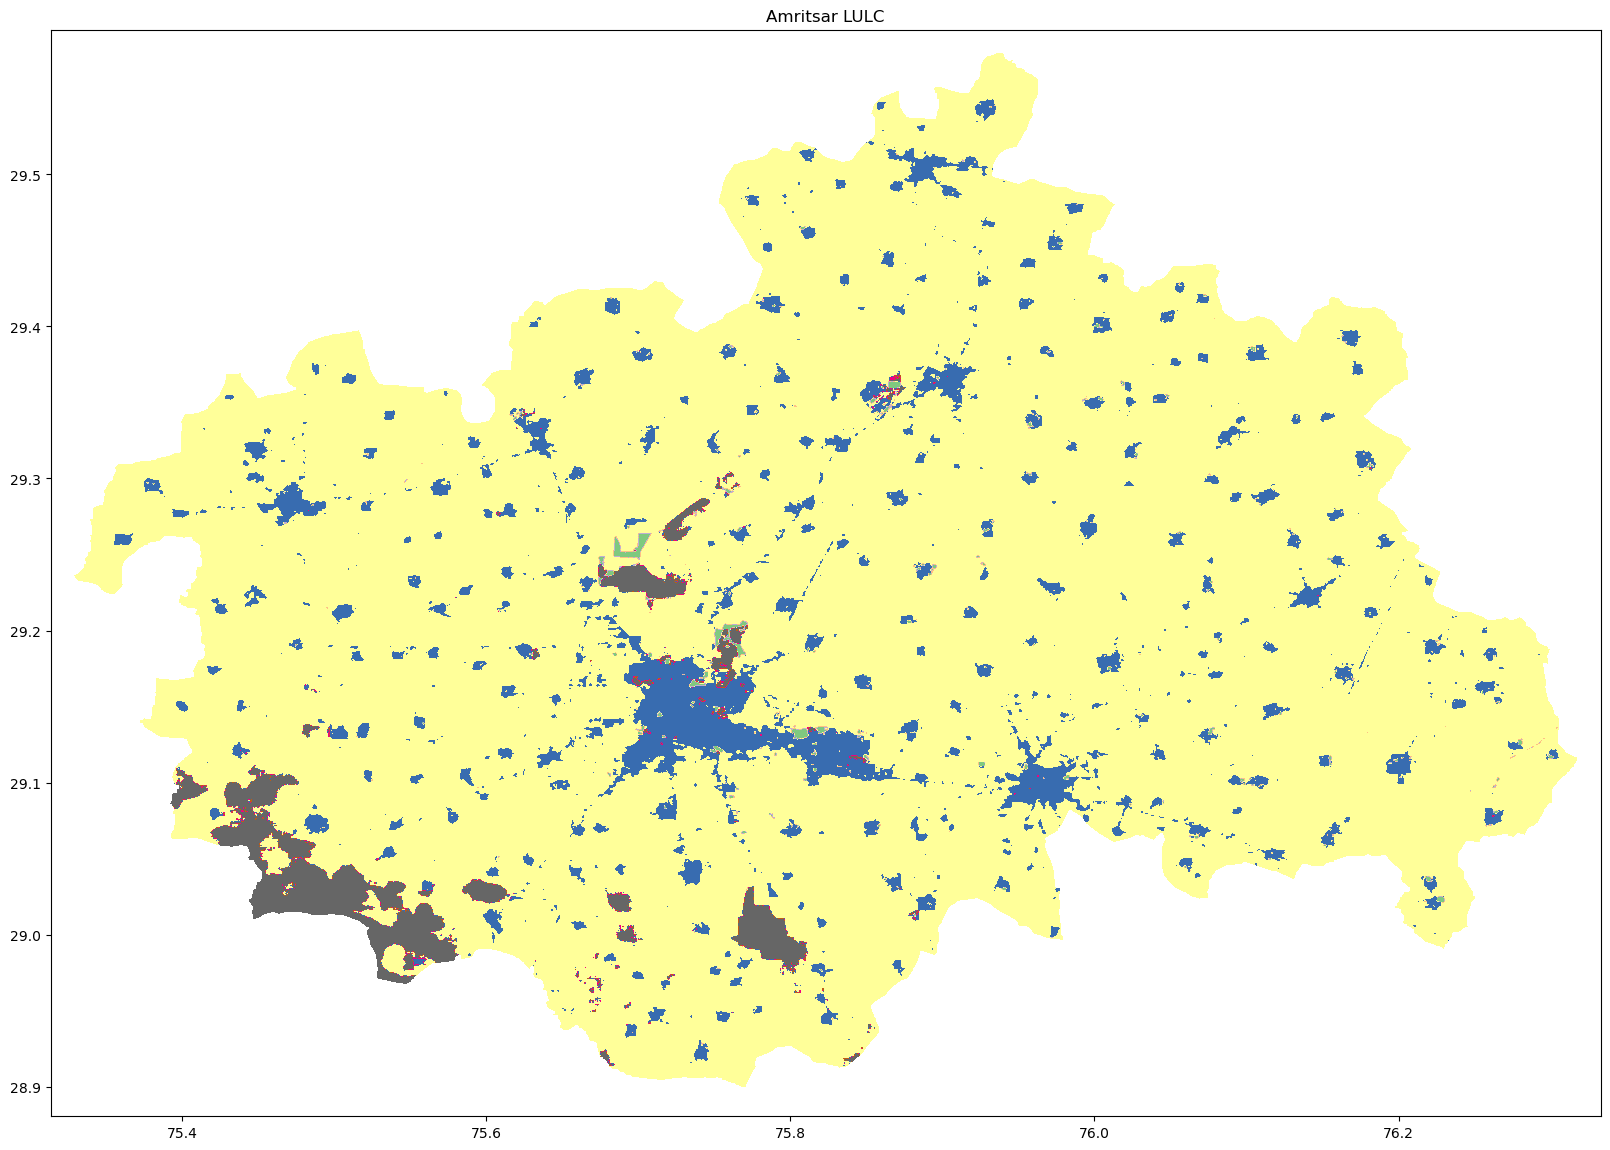

In [28]:
fig = plt.figure(figsize=(20,30))

ax1=fig.add_subplot(1,1,1,title="Hisar LULC")
tiff = rasterio.open(lulclist[0])
im1=rasterio.plot.show(tiff,cmap="Accent")

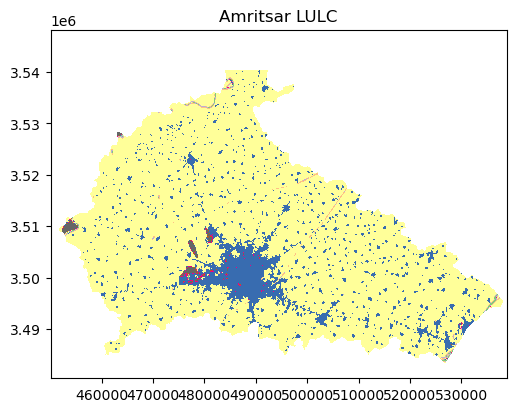

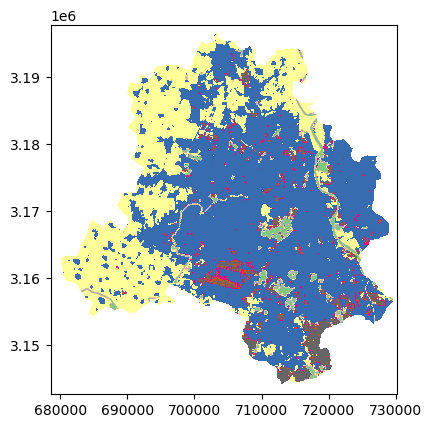

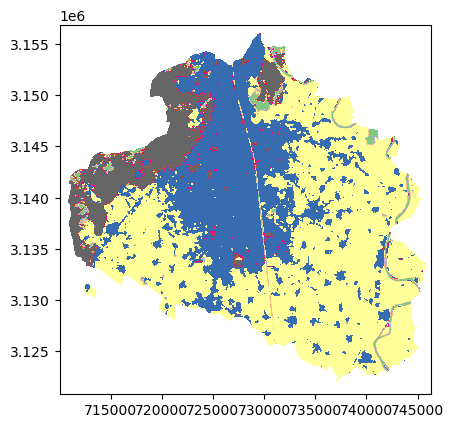

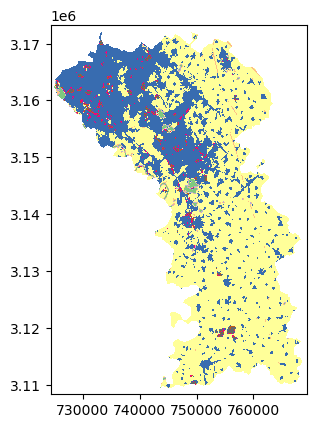

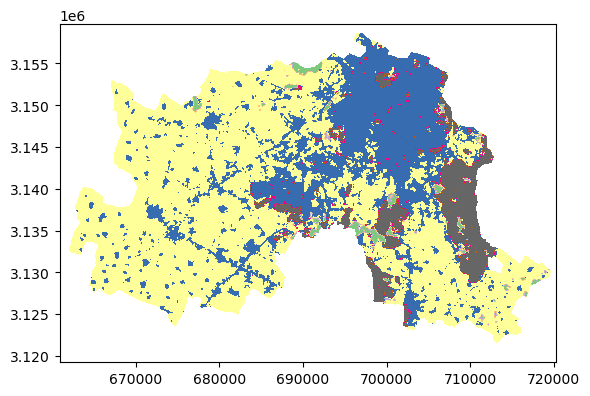

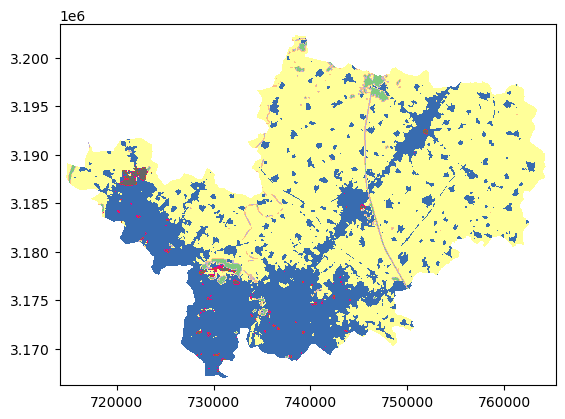

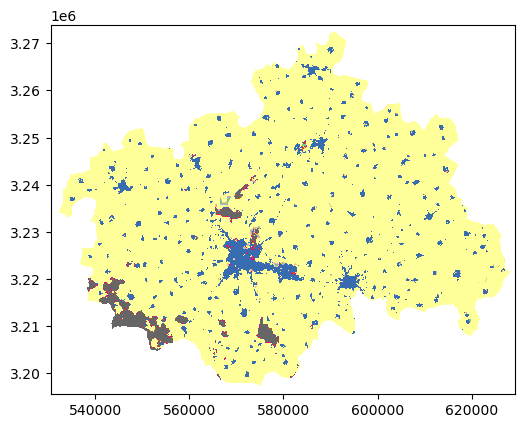

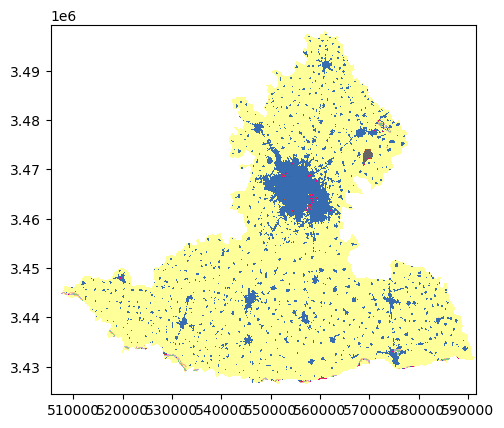

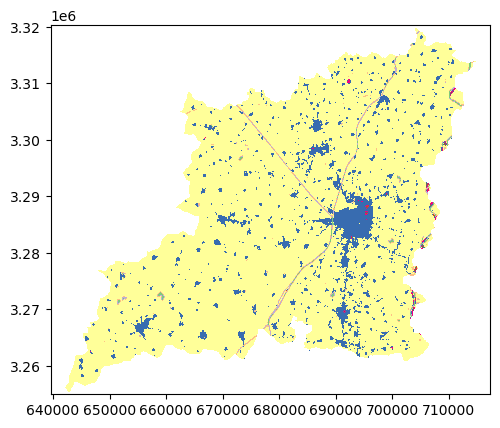

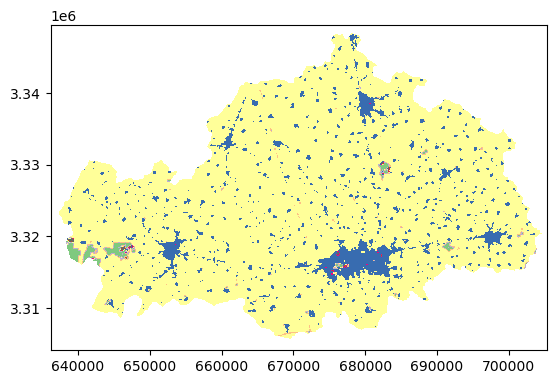

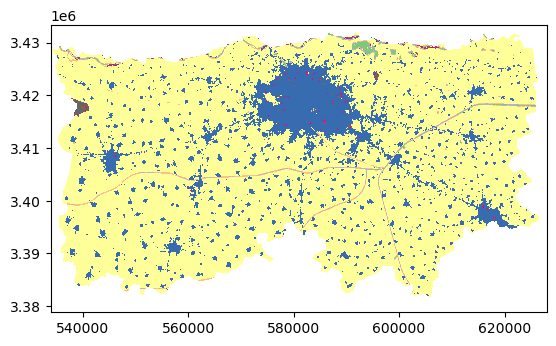

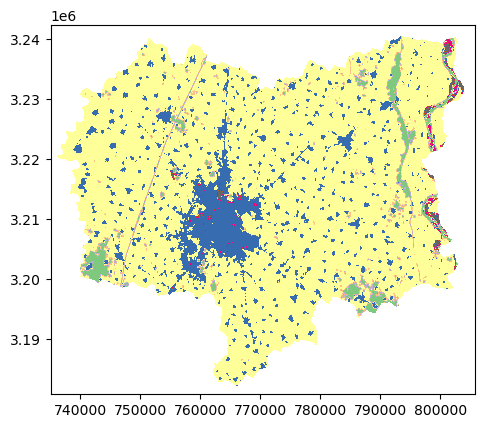

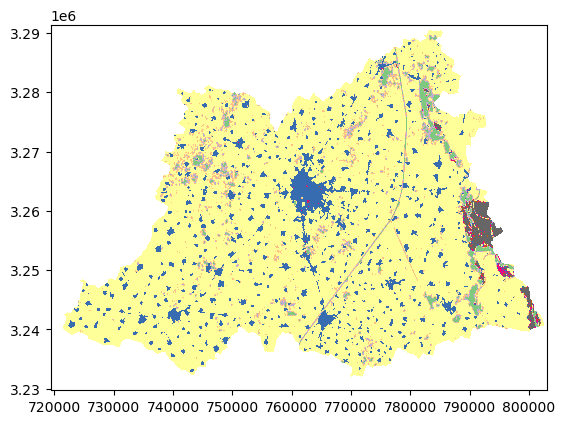

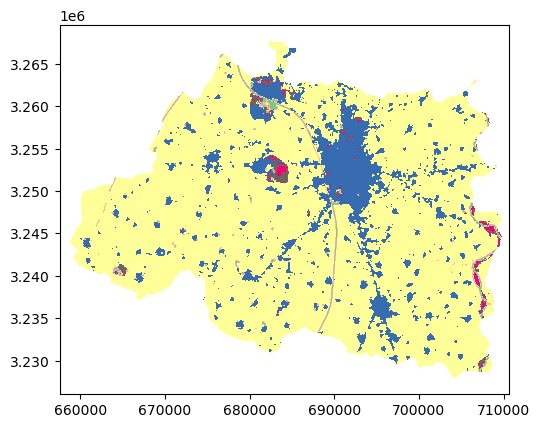

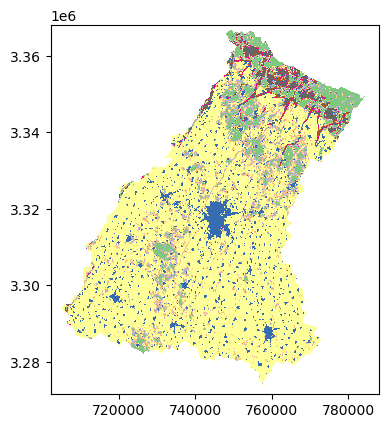

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\IIRS\\Course material\\Mod 4 - Scientific Geocomputing\\Project\\Data\\Output\\lulcfig.png'

<Figure size 640x480 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(20,30))

ax1=fig.add_subplot(5,3,1,title="Amritsar LULC")
tiff = rasterio.open(lulclist[0])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax1)


##########################################################
ax2=fig.add_subplot(5,3,2,title="Delhi LULC")
tiff = rasterio.open(lulclist[1])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax2)

##########################################################
ax3=fig.add_subplot(5,3,3,title="Faridabad LULC")
tiff = rasterio.open(lulclist[2])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax3)

##########################################################
ax4=fig.add_subplot(5,3,4,title="Gautam Buddh Nagar LULC")
tiff = rasterio.open(lulclist[3])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax4)

##########################################################
ax5=fig.add_subplot(5,3,5,title="Gurugram LULC")
tiff = rasterio.open(lulclist[4])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax5)

##########################################################
ax6=fig.add_subplot(5,3,6,title="Ghaziabad LULC")
tiff = rasterio.open(lulclist[5])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax6)

##########################################################
ax7=fig.add_subplot(5,3,7,title="Hisar LULC")
tiff = rasterio.open(lulclist[6])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax7)

##########################################################
ax8=fig.add_subplot(5,3,8,title="Jalandhar LULC")
tiff = rasterio.open(lulclist[7])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax8)

##########################################################
ax9=fig.add_subplot(5,3,9,title='Karnal LULC')
tiff = rasterio.open(lulclist[8])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax9)

##########################################################
ax10=fig.add_subplot(5,3,10,title="Kurukshetra LULC")
tiff = rasterio.open(lulclist[9])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax10)

##########################################################
ax11=fig.add_subplot(5,3,11,title="Ludhiana LULC")
tiff = rasterio.open(lulclist[10])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax11)

##########################################################
ax12=fig.add_subplot(5,3,12,title="Meerut LULC")
tiff = rasterio.open(lulclist[11])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax12)

##########################################################
ax13=fig.add_subplot(5,3,13,title="Muzaffarnagar LULC")
tiff = rasterio.open(lulclist[12])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax13)

##########################################################
ax14=fig.add_subplot(5,3,14,title="Panipat LULC")
tiff = rasterio.open(lulclist[13])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax14)

##########################################################
ax15=fig.add_subplot(5,3,15,title="Saharanpur LULC")
tiff = rasterio.open(lulclist[14])
im1=rasterio.plot.show(tiff,cmap="Accent")
divider = make_axes_locatable(ax15)
plt.savefig('F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Output\lulcfig.png')

# Built-up area calculation from LULC

In [13]:
import pandas as pd
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


In [14]:
import glob
folder = glob.glob('*.tif')
districts = ['Amritsar', 'Delhi', 'Faridabad', 'Gautam Buddh Nagar', 'Gurugram', 'Ghaziabad', 'Hisar', 'Jalandhar', 'Karnal', 'Kurukshetra',
            'Ludhiana', 'Meerut', 'Muzaffarnagar', 'Panipat', 'Saharanpur']

In [15]:
builtarea = []
def builtuparea(path):
    lulc = gdal.Open(path)
#     lulc.GetProjection() 
    lulcarr = lulc.ReadAsArray()
    builtuppixels = lulcarr == 7      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    builtup = np.extract(builtuppixels, lulcarr)
    area = len(builtup)*10*10        
    #since the spatial resolution of sentinel-2 image is 10m
    
    print(f'Built-up area in the district is: {area} m\u00b2') 
    builtarea.append(area)


In [16]:
for i in folder:
    print(f'For {i}:')
    print(builtuparea(i))

For LULCamt.tif:
Built-up area in the district is: 319700300 m²
None
For LULCdel.tif:
Built-up area in the district is: 880782000 m²
None
For LULCfbd.tif:
Built-up area in the district is: 243026000 m²
None
For LULCgbn.tif:
Built-up area in the district is: 449743900 m²
None
For LULCgur.tif:
Built-up area in the district is: 363745200 m²
None
For LULCgzb.tif:
Built-up area in the district is: 295272500 m²
None
For LULChisar.tif:
Built-up area in the district is: 278390800 m²
None
For LULCjld.tif:
Built-up area in the district is: 353546100 m²
None
For LULCknl.tif:
Built-up area in the district is: 224316900 m²
None
For LULCkuk.tif:
Built-up area in the district is: 157006100 m²
None
For LULClud.tif:
Built-up area in the district is: 558946100 m²
None
For LULCMeerut.tif:
Built-up area in the district is: 338684100 m²
None
For LULCMzfngr.tif:
Built-up area in the district is: 249052300 m²
None
For LULCpnp.tif:
Built-up area in the district is: 182814900 m²
None
For LULCshrnp.tif:
Built-u

**Plotting Built up Area**

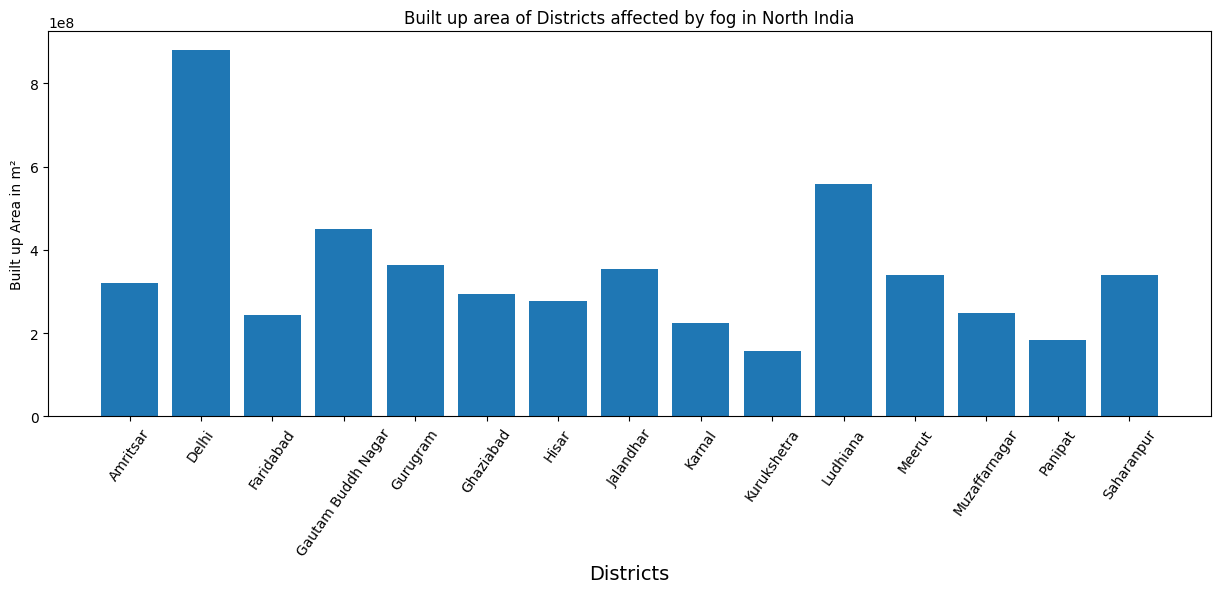

In [17]:
plt.figure(figsize=(15,5))
plt.bar(districts,builtarea)
plt.tick_params(axis='x', rotation=55)
plt.title('Built up area of Districts affected by fog in North India')
plt.xlabel('Districts', fontsize=14)
plt.ylabel('Built up Area in m\u00b2')
plt.savefig('F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Output\_area.png')
plt.show()

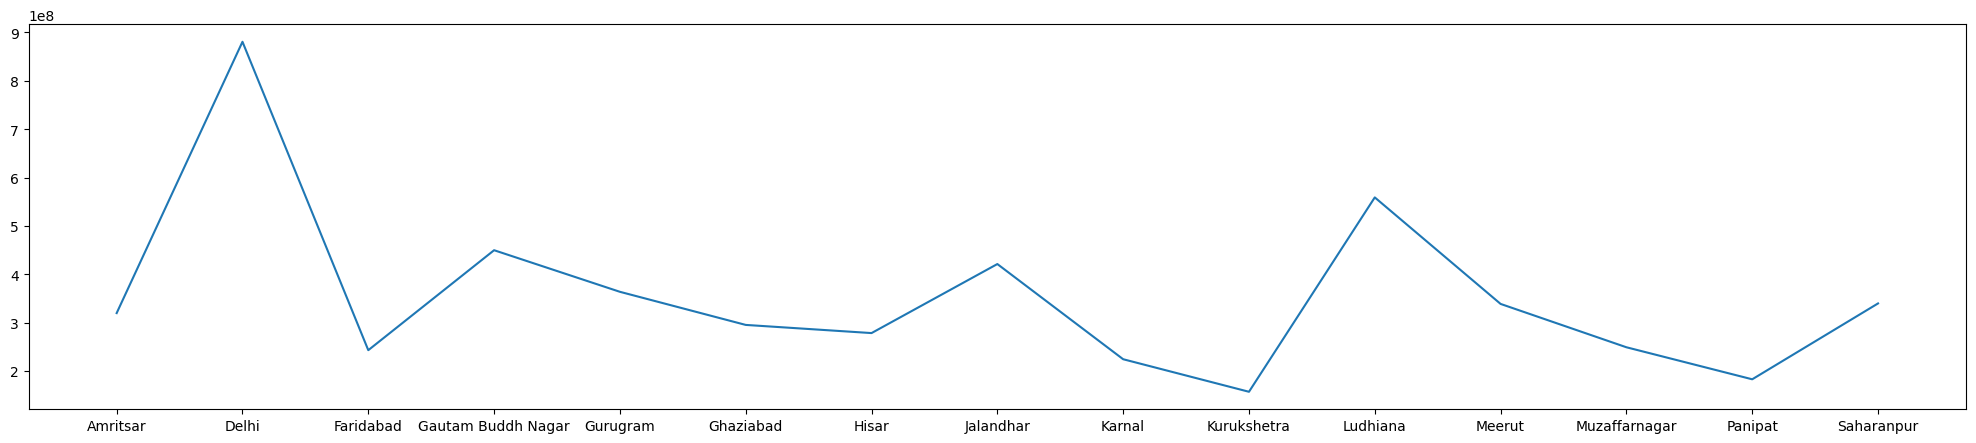

In [174]:
plt.figure(figsize=(25,5))
plt.plot(districts,builtarea)
plt.show()

**Calculation for percentage of built up area: -**

In [165]:
# percentage of built up area
perbuiltup = []
def builtper(path):
    lulc = gdal.Open(path)
 
    lulcarr = lulc.ReadAsArray()
    builtuppixels = lulcarr == 7      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    totalpixel = (lulcarr == 1) + (lulcarr == 2) + (lulcarr == 4) + (lulcarr == 5) + (lulcarr == 7) + (lulcarr == 8) + (lulcarr == 11)
    
    builtup = np.extract(builtuppixels, lulcarr)
    totalarea = np.extract(totalpixel, lulcarr)
    perarea = ((len(builtup)*10*10)/(len(totalarea)*10*10))*100     
    
    print(f'%Built-up area in the district is: {perarea}') 
    perbuiltup.append(perarea)

In [168]:
for i in folder:
    print(f'For {i}:')
    print(builtper(i))

For LULCamt.tif:
%Built-up area in the district is: 12.103446855507013
None
For LULCdel.tif:
%Built-up area in the district is: 59.26981168260933
None
For LULCfbd.tif:
%Built-up area in the district is: 32.66149684662122
None
For LULCgbn.tif:
%Built-up area in the district is: 31.774015193519272
None
For LULCgur.tif:
%Built-up area in the district is: 29.091637909219774
None
For LULCgzb.tif:
%Built-up area in the district is: 32.368842728571565
None
For LULChisar.tif:
%Built-up area in the district is: 6.836676494304607
None
For LULCjld.tif:
%Built-up area in the district is: 13.40329560554335
None
For LULCknl.tif:
%Built-up area in the district is: 9.052408893339827
None
For LULCkuk.tif:
%Built-up area in the district is: 9.365859321191277
None
For LULClud.tif:
%Built-up area in the district is: 15.155993531589953
None
For LULCMeerut.tif:
%Built-up area in the district is: 13.044675431158895
None
For LULCMzfngr.tif:
%Built-up area in the district is: 9.08396905635886
None
For LULCpnp.

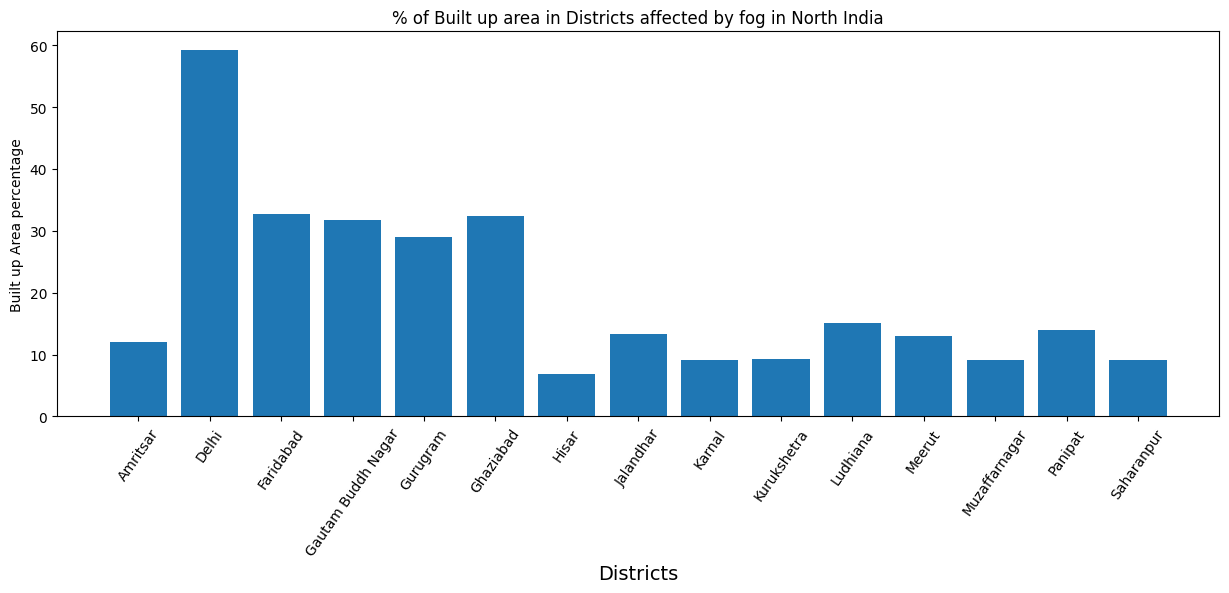

In [169]:
plt.figure(figsize=(15,5))
plt.bar(districts,perbuiltup)
plt.tick_params(axis='x', rotation=55)
plt.title('% of Built up area in Districts affected by fog in North India')
plt.xlabel('Districts', fontsize=14)
plt.ylabel('Built up Area percentage')
plt.savefig('F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Output\_perarea.png')
plt.show()

# Plotting Average Temperature of Districts in Foggy days

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr

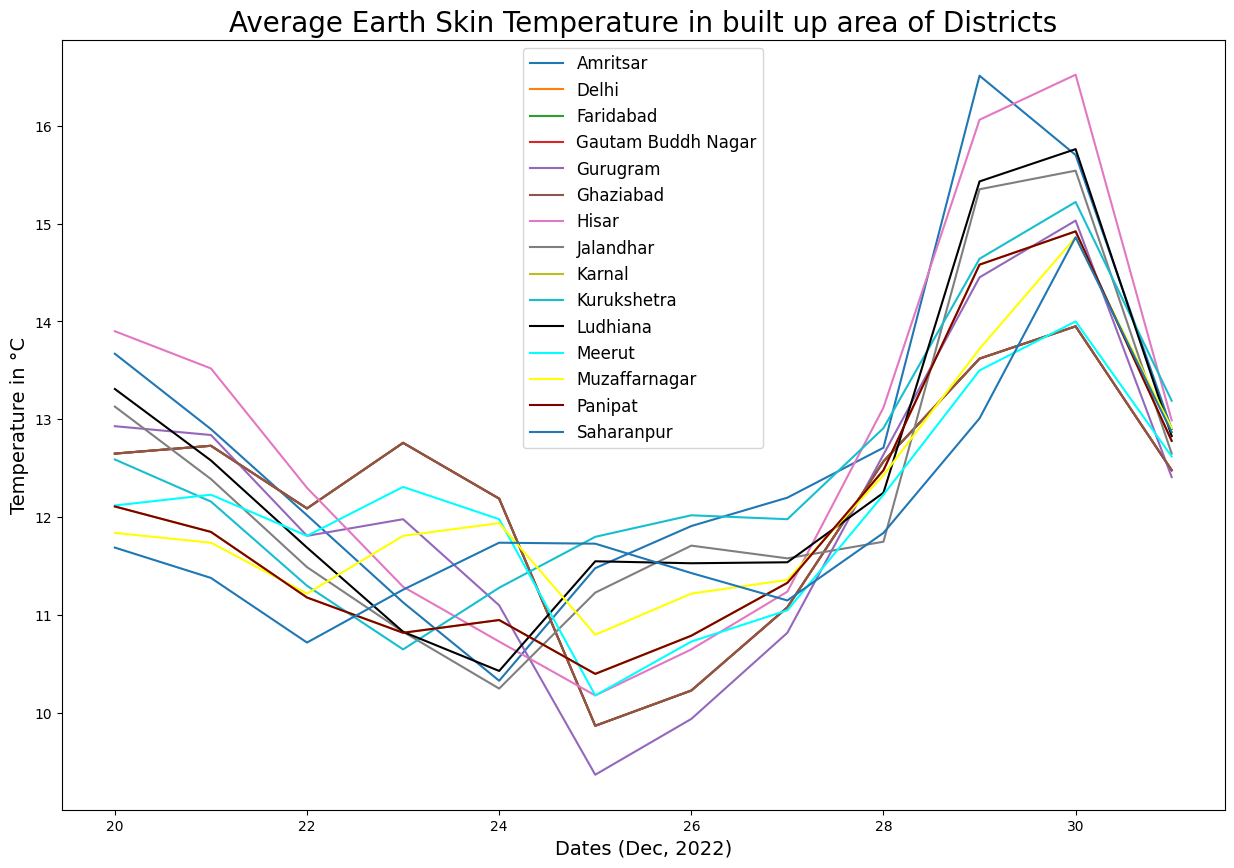

In [19]:
temp1=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Amritsar.csv')
temp2=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Delhi.csv')
temp3=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Faridabad.csv')
temp4=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\GBN.csv')
temp5=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Gurugram.csv')
temp6=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Ghaziabad.csv')
temp7=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Hisar.csv')
temp8=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Jalandhar.csv')
temp9=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Karnal.csv')
temp10=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Kurukshetra.csv')
temp11=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Ludhiana.csv')
temp12=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Meerut.csv')
temp13=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Muzaffarnagar.csv')
temp14=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Panipat.csv')
temp15=pd.read_csv(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Temp\Saharanpur.csv')

plt.figure(figsize=(15,10))
plt.plot(temp1["DY"],temp1["TS"])
plt.plot(temp2["DY"],temp2["TS"])
plt.plot(temp3["DY"],temp3["TS"])
plt.plot(temp4["DY"],temp4["TS"])
plt.plot(temp5["DY"],temp5["TS"])
plt.plot(temp6["DY"],temp6["TS"])
plt.plot(temp7["DY"],temp7["TS"])
plt.plot(temp8["DY"],temp8["TS"])
plt.plot(temp9["DY"],temp9["TS"])
plt.plot(temp10["DY"],temp10["TS"])
plt.plot(temp11["DY"],temp11["TS"],color='black')
plt.plot(temp12["DY"],temp12["TS"],color='cyan')
plt.plot(temp13["DY"],temp13["TS"],color='yellow')
plt.plot(temp14["DY"],temp14["TS"],color='maroon')
plt.plot(temp15["DY"],temp15["TS"])
plt.title('Average Earth Skin Temperature in built up area of Districts', size=20)
plt.xlabel('Dates (Dec, 2022)', fontsize=14)
plt.ylabel('Temperature in \xb0C',fontsize=14)           # '\xb0' is unicode for degree symbol
plt.legend(districts,loc = 'upper center', fontsize='large')
plt.savefig('F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Output\_skt.png')
plt.show()

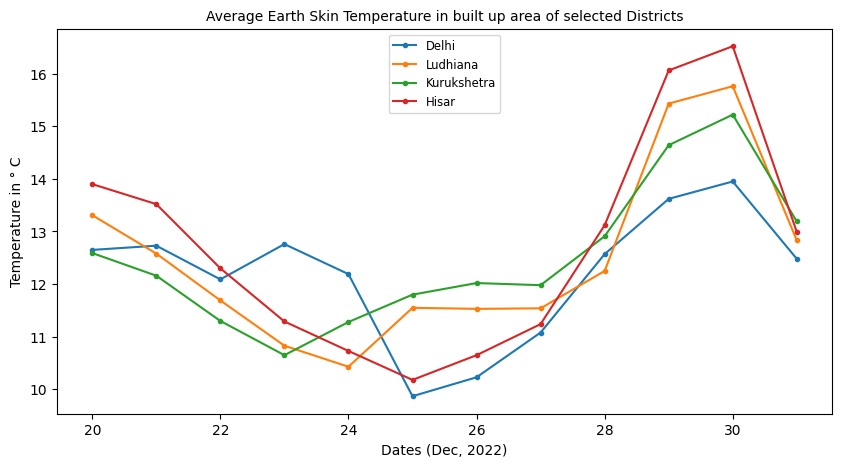

In [137]:
plt.figure(figsize=(10,5))
dist=['Delhi','Ludhiana','Kurukshetra','Hisar']
plt.plot(temp2["DY"],temp2["TS"],'.-')
plt.plot(temp11["DY"],temp11["TS"],'.-')
plt.plot(temp10["DY"],temp10["TS"],'.-')
plt.plot(temp7["DY"],temp7["TS"],'.-')
plt.xlabel('Dates (Dec, 2022)', fontsize=10)
plt.ylabel('Temperature in \xb0 C')
plt.legend(dist,loc = 'upper center', fontsize='small')
plt.title('Average Earth Skin Temperature in built up area of selected Districts', size=10)
plt.savefig('F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Output\_sktdist.png')

**Multiple Bar Graph plot**
(Visualisation not appropriate)

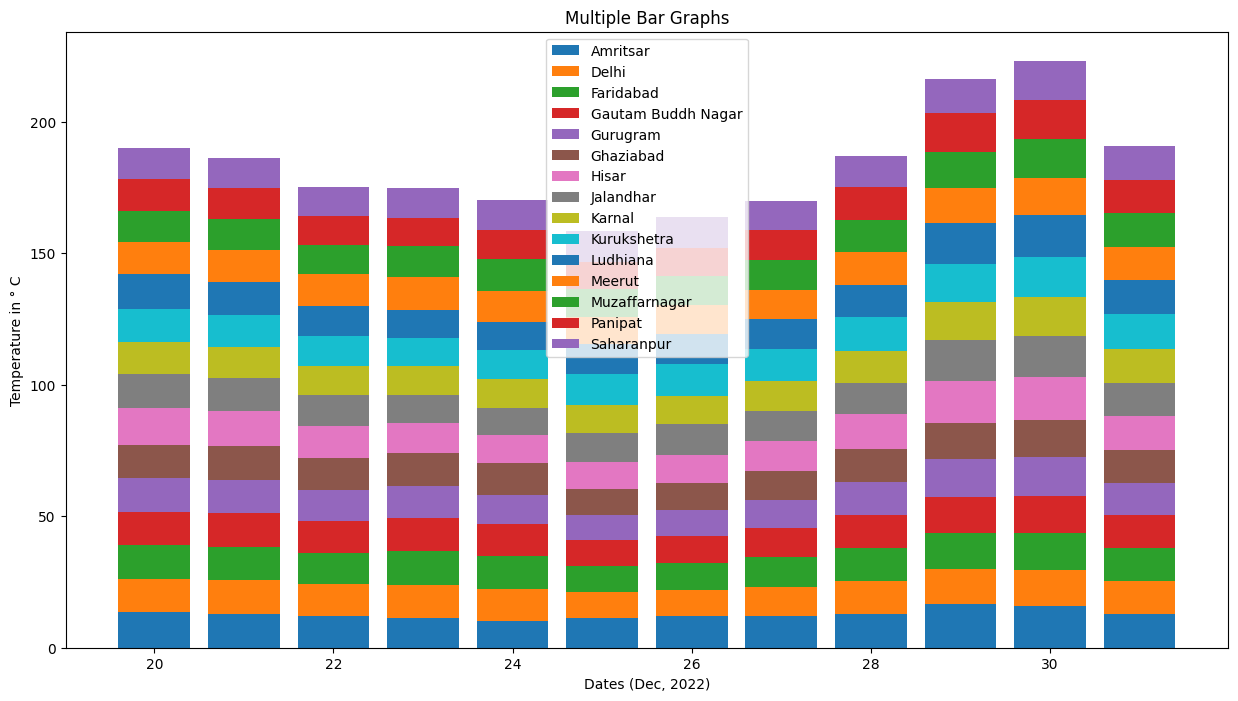

In [143]:
import matplotlib.pyplot as plt
# For Multiple Bar Graph plot ()
data = [temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9, temp10, temp11, temp12, temp13, temp14, temp15]
plt.figure(figsize=(15,8))
# first bar graph
plt.bar(data[0]['DY'], data[0]['TS'])

# Remaining bar graphs and stacking them on top of each other
for i in range(1, len(data)):
    plt.bar(data[i]['DY'], data[i]['TS'], bottom=[sum(data[j]['TS'][k] for j in range(i)) for k in range(len(data[i]['DY']))])


plt.xlabel('Dates (Dec, 2022)')
plt.ylabel('Temperature in \xb0 C')
plt.title('Multiple Bar Graphs')
plt.legend(districts,loc = 'upper center')
plt.show()

**Temperature Bar plots**

<BarContainer object of 12 artists>

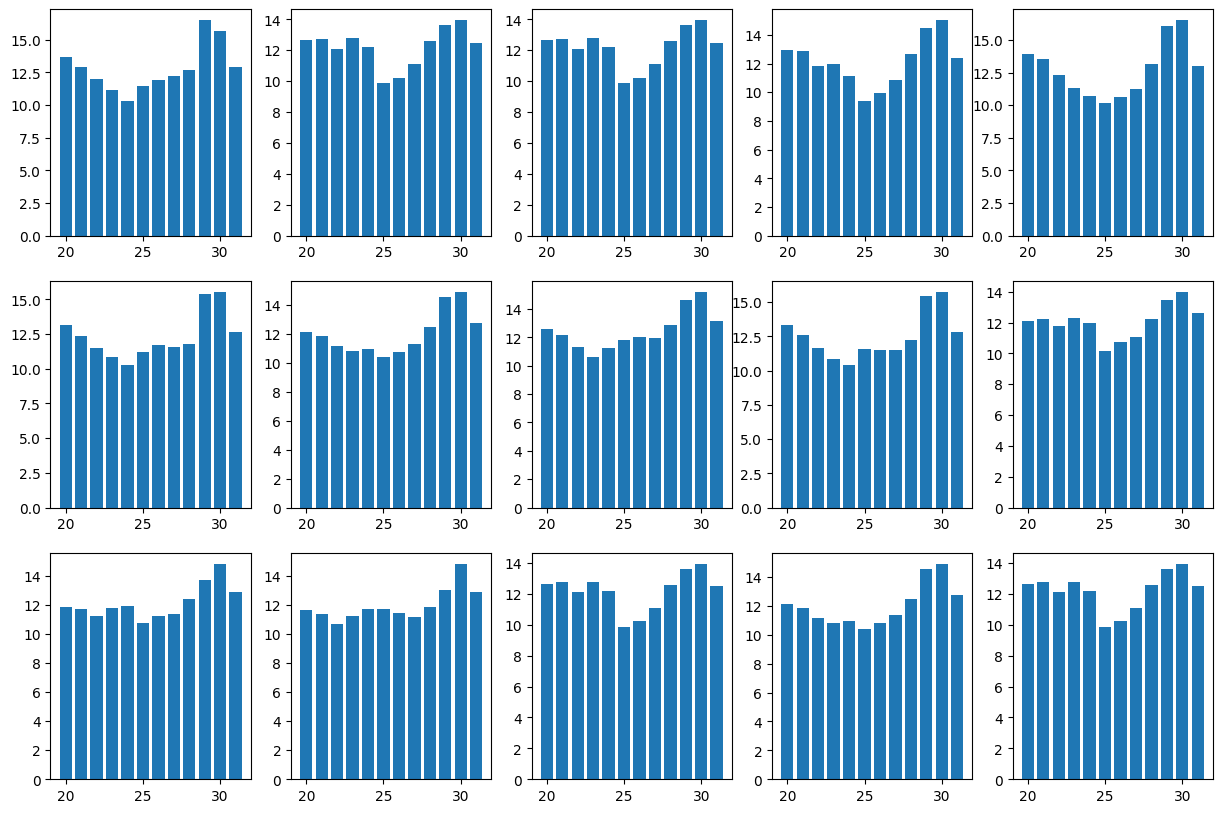

In [202]:
plt.figure(figsize=(15,10))
plt.subplot(3,5,1)
plt.bar(temp1["DY"],temp1["TS"])
plt.subplot(3,5,2)
plt.bar(temp2["DY"],temp2["TS"])
plt.subplot(3,5,3)
plt.bar(temp3["DY"],temp3["TS"])
plt.subplot(3,5,4)
plt.bar(temp4["DY"],temp4["TS"])
plt.subplot(3,5,5)
plt.bar(temp5["DY"],temp5["TS"])
plt.subplot(3,5,6)
plt.bar(temp6["DY"],temp6["TS"])
plt.subplot(3,5,7)
plt.bar(temp7["DY"],temp7["TS"])
plt.subplot(3,5,8)
plt.bar(temp8["DY"],temp8["TS"])
plt.subplot(3,5,9)
plt.bar(temp9["DY"],temp9["TS"])
plt.subplot(3,5,10)
plt.bar(temp10["DY"],temp10["TS"])
plt.subplot(3,5,11)
plt.bar(temp11["DY"],temp11["TS"])
plt.subplot(3,5,12)
plt.bar(temp12["DY"],temp12["TS"])
plt.subplot(3,5,13)
plt.bar(temp13["DY"],temp13["TS"])
plt.subplot(3,5,14)
plt.bar(temp14["DY"],temp14["TS"])
plt.subplot(3,5,15)
plt.bar(temp15["DY"],temp15["TS"])